## Семинар 13
# Тема: Кластеризация

_Кластеризация_ относится к методам обучения без учителя.

Задача кластеризации состоит в разбиении множества исходных объектов на подмножества близких по свойствам объектов. Понятие _близости_ формализуется при помощи задания _метрики_, или расстояния между объектами $\rho\left(x_i,x_j\right)$.

### Метод k-means.
Познакомимся с одним из наиболее известных алгоритмов кластеризации: _k-means_ или _k средних_.

Алгоритм метода выглядит следующим образом:

1. Случайным образом выбираются k точек $x_k \in X$, в дальнейшем будем называть их центрами кластеров (центроидами);

2. Для каждой точки $x_i \in X$ вычисляется $\rho\left(x_i,x_k\right)$, после чего ей ставится в соответствие  ближайший к ней центр кластера. Совокупность точек, отнесённых к центру $x_k$ называется кластером;

3. Вычисляются средние взвешенные точек (центры масс), принадлежащих к определённому кластеру. Эти значения становятся новыми центрами кластеров;

4. Шаги 2 и 3 повторяются до тех пор, пока пересчёт центров кластеров будет существенно менять местоположение кластеров. Как только высчитанные центры кластеров совпадут с предыдущими, алгоритм будет окончен.

Следует иметь в виду, что этот алгоритм хорошо работает только для нормальных выборок, причем кластеры не должны существенно перекрываться.

Недостатком алгоритма является то, что число кластеров в нем - гиперпараметр, т.е. должно быть задано изначально.


### Метод DBSCAN.

Познакомиться с методом машинного обучения DBSCAN, осуществляющим группировку наблюдений в кластеры высокой плотности.

DBSCAN имеет три основных устанавливаемых параметра:

♦ eps — максимальное расстояние от наблюдения, чтобы считать другое наблюдение его соседом;

♦ min sampies — минимальное число наблюдений, находящихся на расстоянии менее eps от наблюдения, для того чтобы его можно было считать ключевым наблюдением;

♦ metric— метрический показатель расстояния, используемый параметром eps,
например minkowski или euclidean (обратите внимание, что если используется
расстояние Минковского, то может быть использован параметр р для установки
мощности метрического показателя Минковского).

Наблюдения подразделяются на три типа точек:

1. Центральная точка (точка данных является центральной, если круг радиуса eps вокруг нее содержит не менее min_sampies точек)

2. Граничная точка (количество точек меньше min_sampies, но есть хотя бы одна центральная)

3. Шум (нет ни одной центральной точки в круге радиуса eps вокруг нее)

Алгоритм хорошо работает с кластерами произвольной формы, число кластеров определяется в ходе работы алгоритма, а не задаётся, как гиперпараметр. Хуже работает на данных с разной плотностью.

Silhouette Score — это метрика для оценки качества результатов кластеризации. Она измеряет, насколько точка данных похожа на собственный кластер по сравнению с другими кластерами. Оценка варьируется от –1 до 1, где более высокое значение указывает на лучшую производительность кластеризации. Значение, близкое к 1, предполагает, что точки данных хорошо кластеризованы и правильно разделены, а значение, близкое к -1, указывает на то, что точки данных могли быть отнесены к неправильным кластерам. В коде Silhouette Score рассчитывается с помощью функции silhouette_score().

Загрузим необходимые библиотеки:

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Метод k-means.

### 1. Сформируйте данные при помощи make_blobs(n_samples=1000, centers=5, random_state=10). Выведите полученные данные в виде датафрейма, дав названия колонкам X1 и  X2. Визуализируйте их при помощи диаграммы рассеяния.

In [134]:
X, _ = make_blobs(n_samples=1000, centers=5, random_state=10)

In [135]:
df = pd.DataFrame(X, columns = ["X1","X2"])
df.head()

,X1,X2
0,4.401660,-9.424562
1,-6.706999,-8.433564
2,-6.253321,5.015825
3,7.411799,-8.137795
4,-4.839208,5.689303


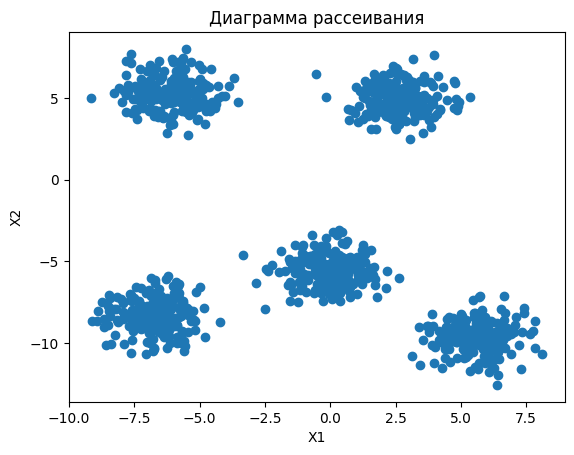

In [136]:
plt.scatter(X[:,0], X[:,1])
plt.title("Диаграмма рассеивания")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### 2. Масштабируйте данные при помощи MinMaxScaler.

In [137]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(df)

In [138]:
pd.DataFrame(X_scaler, columns = df.columns).head()

,X1,X2
0,0.785333,0.152662
1,0.141640,0.200842
2,0.167929,0.854730
3,0.959756,0.215222
4,0.249870,0.887474


### 3. Создайте экземпляр класса k-средних с пятью кластерами, зафиксировав random_state = 42. Обучите эту модель на масштабированных данных. Выведите метки кластеров при помощи атрибута .labels_ и при помощи метода .predict(). Убедитесь, что результат будет одинаковый.

In [139]:
model = KMeans(random_state = 42, n_clusters=5)

In [140]:
model.fit(X_scaler)

KMeans(n_clusters=5, random_state=42)

In [141]:
model.labels_[:5]

array([2, 0, 3, 2, 3], dtype=int32)

In [142]:
model.predict(X_scaler)[:5]

array([2, 0, 3, 2, 3], dtype=int32)

In [143]:
(model.labels_ == model.predict(X_scaler)).sum()

np.int64(1000)

### 4. Выведите центры кластеров с помощью атрибута .cluster_centers_. Ремасштабируйте центры кластеров при помощи метода .inverse_transform().

In [144]:
model.cluster_centers_

array([[0.14003281, 0.20773946],
       [0.68325617, 0.85205688],
       [0.8520994 , 0.1432125 ],
       [0.17895293, 0.86742103],
       [0.52600287, 0.34328769]])

In [145]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[-6.73474199, -8.29170239],
       [ 2.64004968,  4.96083603],
       [ 5.55389732, -9.61891479],
       [-6.06306977,  5.27685104],
       [-0.07378228, -5.50370058]])

### 5. Визуализируйте полученные кластеры, подкрасив их разными цветами. Также на этом рисунке укажите центры кластеров, пометив их красными ромбами.

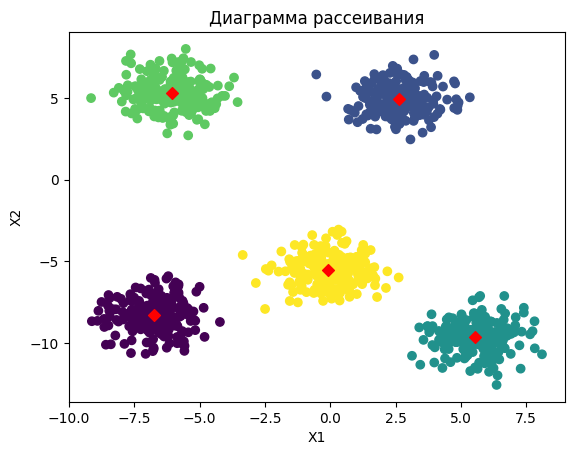

In [146]:
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.scatter(centers[:,0], centers[:,1], color='red', marker='D')
plt.title("Диаграмма рассеивания")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### 6. Выведите сумму квадратов расстояний образцов до ближайшего центра кластера при помощи атрибута .inertia_

In [147]:
model.inertia_

5.329461618751001

### 7. Осуществите проверку правильности выбора гиперпараметра модели k-средних "количество кластеров" (n_clusters=5) методом локтя. Для этого постройте график зависимости количества кластеров от значения inertia_. Правильное количество кластеров будет тo, где построенная кривая имеет наиболее сильный излом ("локоть"), то есть то, после которого значение inertia_ перестаёт существенно снижаться.

In [148]:
inertia = []
for i in range(2, 10):
  models = KMeans(random_state = 42, n_clusters=i)
  models.fit(X_scaler)
  inertia.append(models.inertia_)
inertia

[85.77976294986857,
 45.20410914411041,
 19.74832786817237,
 5.329461618751001,
 4.951191888183383,
 4.487004104683382,
 4.0760393690535635,
 3.698929824426553]

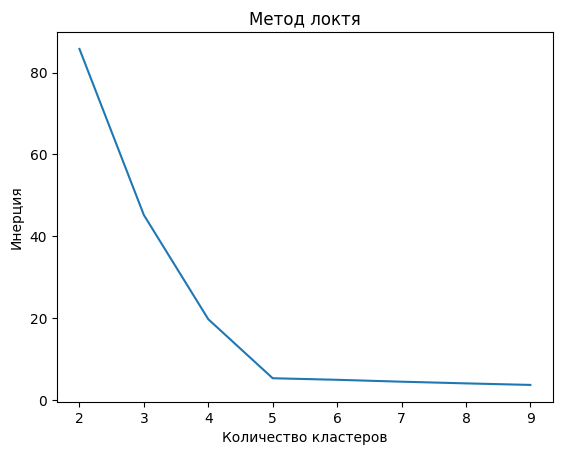

In [149]:
plt.plot(range(2, 10), inertia)
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.show()

### 8. Оцените качество кластеризации при помощи метрики Silhouette Score.

In [150]:
silhouette_score(X, model.labels_)

np.float64(0.770389792851104)

# Метод DBSCAN.

### 1. Загрузите встроенный датасет iris. В качестве рассматриваемых данных, возьмите второй и третий столбцы датасета. Выведите данные в виде датафрейма c названиями колонок.

In [151]:
iris = datasets.load_iris()
X = iris.data[:, 1:3]
y = iris.target

In [152]:
X[:5]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4]])

In [153]:
df = pd.DataFrame(X, columns = iris.feature_names[1:3])
df.head()

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


### 2. Визуализируйте данные на диаграмме рассеяния.

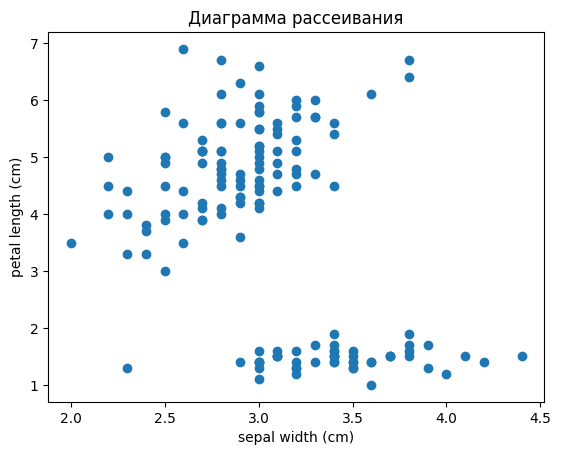

In [154]:
plt.scatter(X[:,0], X[:,1])
plt.title("Диаграмма рассеивания")
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

### 3. Стандартизируйте данные при помощи StandardScaler.

In [155]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(df)

In [156]:
pd.DataFrame(X_scaler, columns = df.columns).head()

,sepal width (cm),petal length (cm)
0,1.019004,-1.340227
1,-0.131979,-1.340227
2,0.328414,-1.397064
3,0.098217,-1.283389
4,1.249201,-1.340227


### 4. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.

In [157]:
model = DBSCAN(eps=0.65, min_samples=8,n_jobs=-1)

In [158]:
model.fit(X_scaler)

DBSCAN(eps=0.65, min_samples=8, n_jobs=-1)

In [159]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### 5. Выведите получившееся в результате работы алгоритма, количество кластеров.

In [160]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

### 6. Выведите количество наблюдений, отнесённых к шумам. Для шумов метка кластеров равна -1.

In [161]:
n_noise = list(model.labels_).count(-1)
n_noise

4

### 7. Визуализируйте полученные кластеры и шумы, подкрасив их разными цветами.

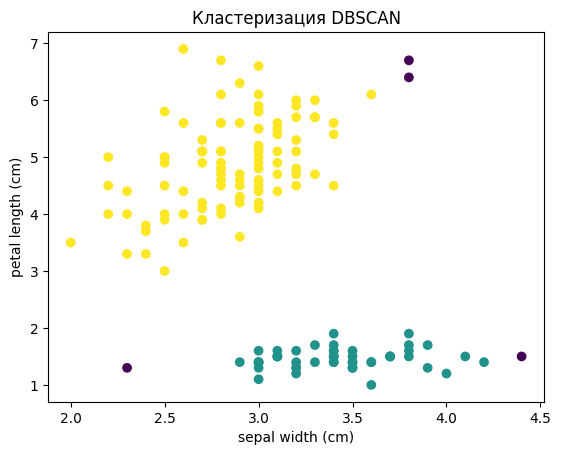

In [162]:
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.title("Кластеризация DBSCAN")
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

### 8. Оцените качество кластеризации при помощи метрики Silhouette Score.

In [163]:
silhouette_score(X, model.labels_)

np.float64(0.6639710599136929)

### Задания самостоятельного для выполнения:

### Метод k-means.
1. Загрузите прилагающийся датасет Mall_Customers.csv.
2. Оставьте в нём только два столбца Annual Income и Spending Score.
3. Масштабируйте данные при помощи StandardScaler.
4. Визуализируйте данные при помощи диаграммы рассеяния и сделайте предположение о количестве кластеров.
5. Определите наилучшее число кластеров с помощью метода локтя.
6. Обучите модель k-средних с лучшим числом кластеров и предскажите метки кластеров для каждого значения из датасета.
7. Визуализируйте полученные кластеры разными цветами с изображением центров кластеров.
8. Оцените эффективность кластеризации с помощью метрики Silhouette Score.

1. Загрузите прилагающийся датасет Mall_Customers.csv.

In [164]:
df = pd.read_csv("Mall_Customers.csv.xls")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [165]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

2. Оставьте в нём только два столбца Annual Income и Spending Score.

In [166]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


3. Масштабируйте данные при помощи StandardScaler.

In [167]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [168]:
pd.DataFrame(X_scaler, columns = X.columns).head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


4. Визуализируйте данные при помощи диаграммы рассеяния и сделайте предположение о количестве кластеров.

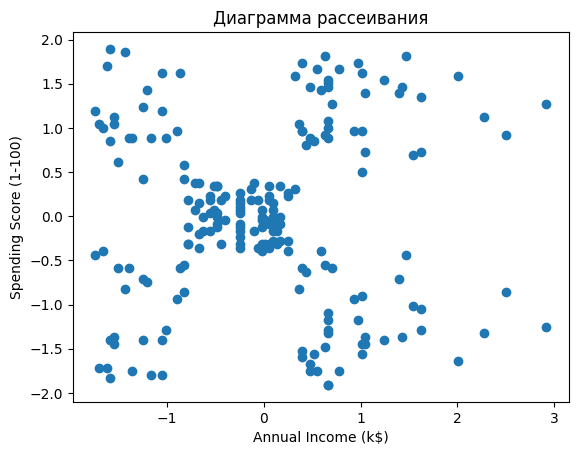

In [169]:
plt.scatter(X_scaler[:,0], X_scaler[:,1])
plt.title("Диаграмма рассеивания")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

5. Определите наилучшее число кластеров с помощью метода локтя.

In [170]:
inertia = []
for i in range(2, 10):
  models = KMeans(random_state = 42, n_clusters=i)
  models.fit(X_scaler)
  inertia.append(models.inertia_)
inertia

[273.66888662642003,
 157.70400815035939,
 109.22822707921345,
 65.56840815571681,
 60.132874871934206,
 49.668244837367965,
 37.31912287833882,
 32.495081199100916]

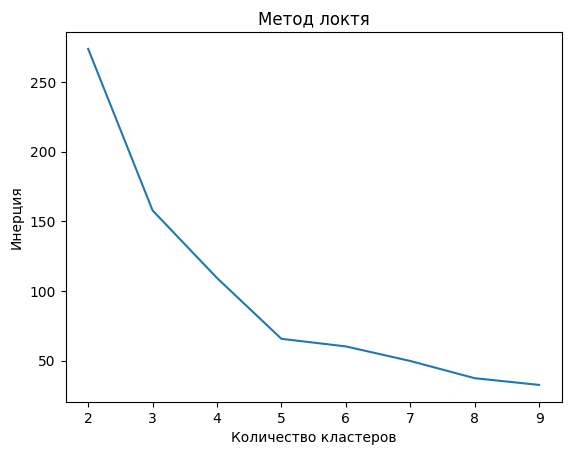

In [171]:
plt.plot(range(2, 10), inertia)
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.show()

6. Обучите модель k-средних с лучшим числом кластеров и предскажите метки кластеров для каждого значения из датасета.

In [172]:
model = KMeans(random_state = 42, n_clusters=5)

In [173]:
model.fit(X_scaler)

KMeans(n_clusters=5, random_state=42)

In [174]:
model.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [175]:
model.predict(X_scaler)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [176]:
(model.labels_ == model.predict(X_scaler)).sum()

np.int64(200)

7. Визуализируйте полученные кластеры разными цветами с изображением центров кластеров.

In [177]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

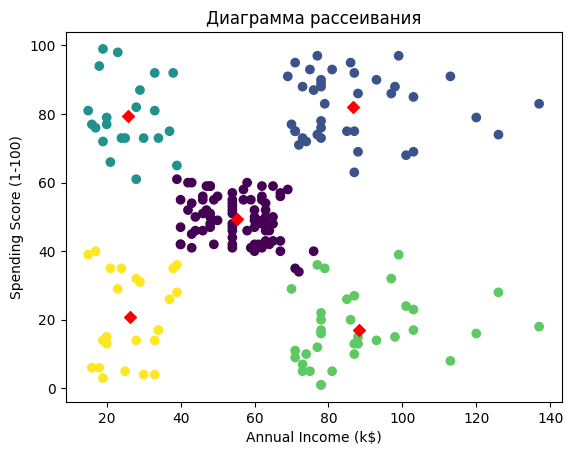

In [178]:
plt.scatter(X[X.columns[0]], X[X.columns[1]], c=model.labels_)
plt.scatter(centers[:,0], centers[:,1], color='red', marker='D')
plt.title("Диаграмма рассеивания")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

8. Оцените эффективность кластеризации с помощью метрики Silhouette Score.

In [179]:
silhouette_score(X, model.labels_)

np.float64(0.553931997444648)

### Метод DBSCAN.
1. Загрузите встроенный датасет iris. Выведите данные в виде датафрейма c названиями колонок.
2. Стандартизируйте данные при помощи StandardScaler.
3. Создайте класс DBSCAN(n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.
4. Выведите получившееся в результате работы алгоритма, количество кластеров.
5. Выведите количество наблюдений, отнесённых к шумам.
6. Оцените качество кластеризации при помощи метрики Silhouette Score.
7. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_. Оцените качество кластеризации при помощи метрики Silhouette Score и сделайте вывод о том, улучшилась ли работа алгоритма при изменении гиперпараметров модели.
8. Повторите задание 7, используя Pipeline.

1. Загрузите встроенный датасет iris. Выведите данные в виде датафрейма c названиями колонок.

In [180]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [181]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [182]:
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2. Стандартизируйте данные при помощи StandardScaler.

In [183]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [184]:
pd.DataFrame(X_scaler, columns =iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


3. Создайте класс DBSCAN(n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_.

In [185]:
model = DBSCAN(n_jobs=-1)

In [186]:
model.fit(X_scaler)

DBSCAN(n_jobs=-1)

In [187]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

4.
Выведите получившееся в результате работы алгоритма, количество кластеров.

In [188]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

5. Выведите количество наблюдений, отнесённых к шумам.

In [189]:
n_noise = list(model.labels_).count(-1)
n_noise

34

6.
Оцените качество кластеризации при помощи метрики Silhouette Score.

In [190]:
silhouette_score(X, model.labels_)

np.float64(0.38613467525138284)

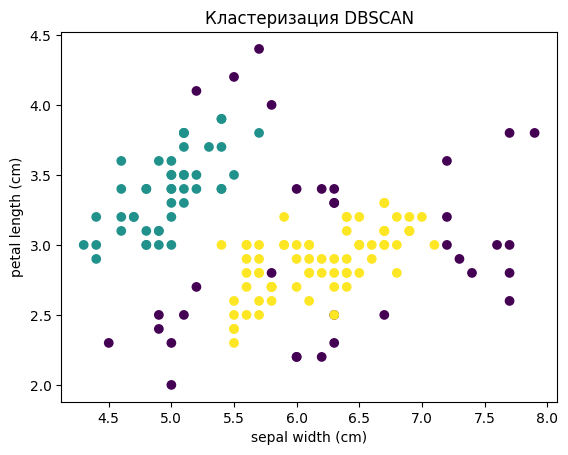

In [191]:
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.title("Кластеризация DBSCAN")
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

7. Создайте класс DBSCAN(eps=0.65, min_samples=8,n_jobs=-1). Обучите на стандартизированных данных. Выведите метки кластеров при помощи атрибута .labels_. Оцените качество кластеризации при помощи метрики Silhouette Score и сделайте вывод о том, улучшилась ли работа алгоритма при изменении гиперпараметров модели.

In [192]:
model_ = DBSCAN(eps=0.65, min_samples=8,n_jobs=-1)

In [193]:
model_.fit(X_scaler)

DBSCAN(eps=0.65, min_samples=8, n_jobs=-1)

In [194]:
model_.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [195]:
silhouette_score(X, model_.labels_)

np.float64(0.40857646137250053)

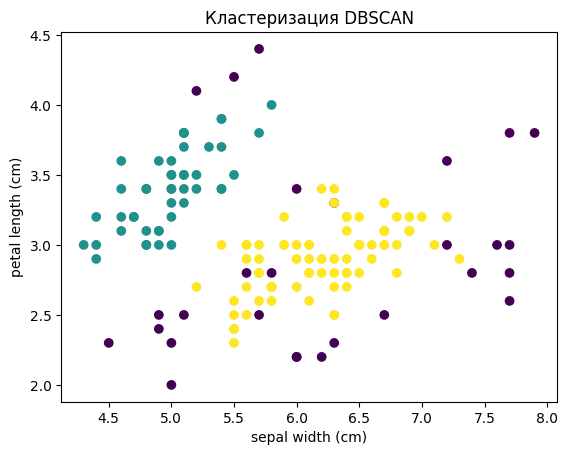

In [196]:
plt.scatter(X[:,0], X[:,1], c=model_.labels_)
plt.title("Кластеризация DBSCAN")
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

8. Повторите задание 7, используя Pipeline.

In [199]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.65, min_samples=8, n_jobs=-1))
])

In [200]:
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dbscan', DBSCAN(eps=0.65, min_samples=8, n_jobs=-1))])

In [201]:
labels = pipeline.named_steps['dbscan'].labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [202]:
silhouette_score(X, labels)

np.float64(0.40857646137250053)